In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# Set random seed for reproducibility
np.random.seed(0)

# Generate a mock dataset (10x10 matrix)
data = np.random.rand(10, 10)

# Create a DataFrame with row and column labels
df = pd.DataFrame(data, columns=[f"Gene_{i}" for i in range(1, 11)], 
                  index=[f"Sample_{i}" for i in range(1, 11)])

df.head()

,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10
Sample_1,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442
Sample_2,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012
Sample_3,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662
Sample_4,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820
Sample_5,0.359508,0.437032,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428,0.363711


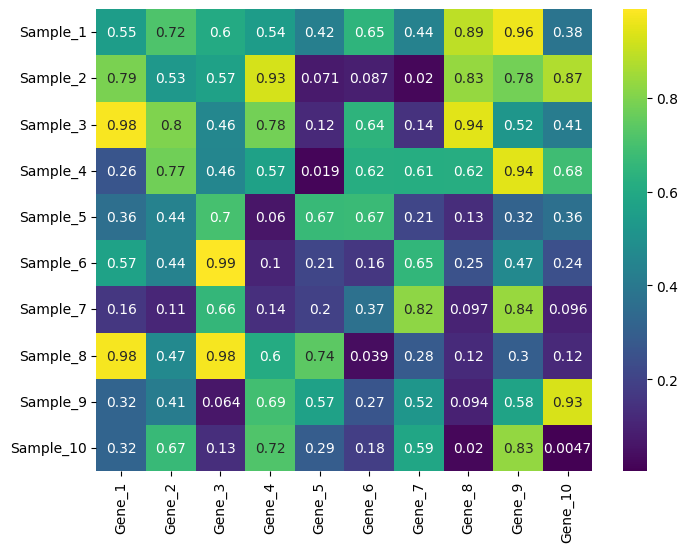

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Generate a heatmap
sns.heatmap(df, cmap='viridis', annot=True)

# Display the plot
plt.show()

In [4]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context

In [5]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

In [6]:
# read in data
data = sc.read_h5ad("NRclean_clustered.h5ad") 

In [7]:
# make an object without healthy tissue 
disease = data[~data.obs["cancer_subtype"].isin(["NA"])]

In [8]:
# Calculate the mean scores for each cluster
cluster_labels = disease.obs['clean_labels_v1']
uptake_scores = disease.obs['Uptake_score']
cancer_subtype = disease.obs['cancer_type_broad']

In [9]:
# Create a DataFrame with the mean scores per cluster
scores_df = pd.DataFrame({
    'Uptake_score': uptake_scores,
    'cluster': cluster_labels,
    'cancer_subtype': cancer_subtype
})

mean_scores_df = scores_df.groupby(['cancer_subtype', 'cluster']).mean().unstack()
mean_scores_df = mean_scores_df.T

/scratch/temp/11116107/ipykernel_3279239/50111509.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


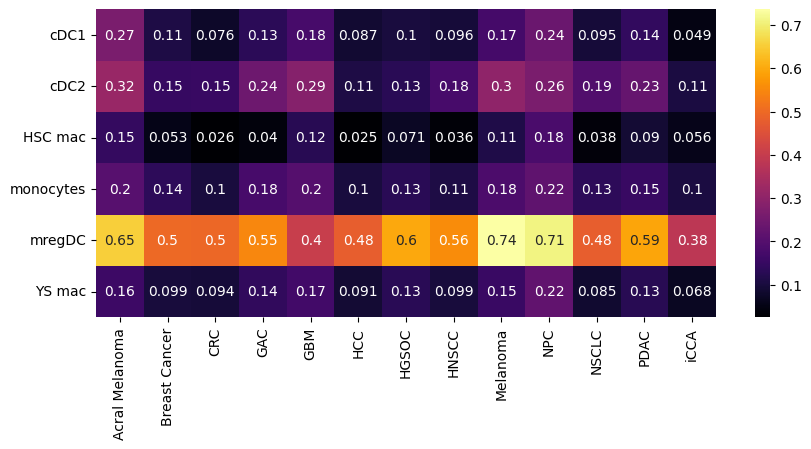

In [16]:
# Plot the heatmap
plt.figure(figsize=(10, 4))
ax = sns.heatmap(mean_scores_df, cmap='inferno', annot=True)
ax.set_yticklabels(['cDC1', 'cDC2', 'HSC mac','monocytes','mregDC','YS mac'], rotation=0)  # Change the labels and their rotation
plt.xlabel('')
plt.ylabel('')
plt.show()

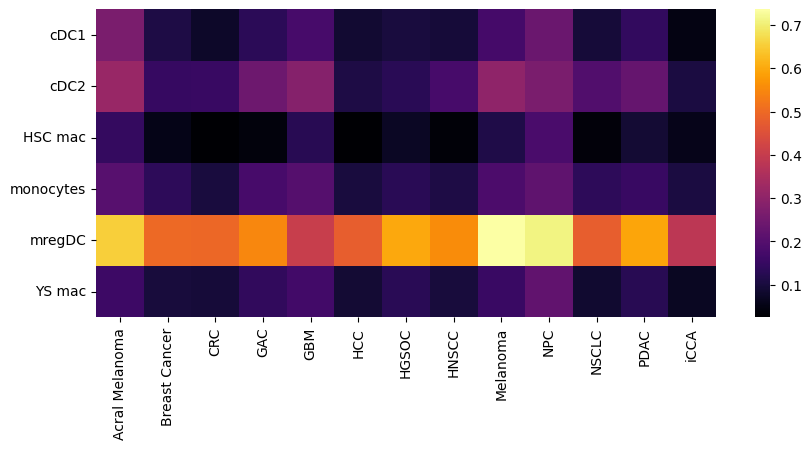

In [17]:
# Plot the heatmap
plt.figure(figsize=(10, 4))
ax = sns.heatmap(mean_scores_df, cmap='inferno')
ax.set_yticklabels(['cDC1', 'cDC2', 'HSC mac','monocytes','mregDC','YS mac'], rotation=0)  # Change the labels and their rotation
plt.xlabel('')
plt.ylabel('')
plt.show()

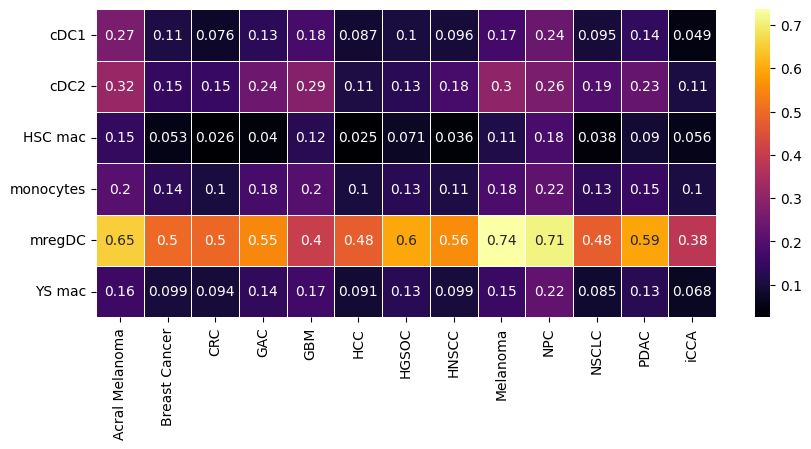

In [26]:
# Plot the heatmap
plt.figure(figsize=(10, 4))
ax = sns.heatmap(mean_scores_df, cmap='inferno', annot=True, linewidths=.5)
ax.set_yticklabels(['cDC1', 'cDC2', 'HSC mac','monocytes','mregDC','YS mac'], rotation=0)  # Change the labels and their rotation
plt.xlabel('')
plt.ylabel('')
plt.show()

In [28]:
import matplotlib as mpl

# Get the current default DPI
current_dpi = mpl.rcParams['figure.dpi']
print(f"Current DPI: {current_dpi}")

Current DPI: 100.0


In [29]:
# Get the current default facecolor
current_facecolor = mpl.rcParams['figure.facecolor']
print(f"Current facecolor: {current_facecolor}")

Current facecolor: white


In [30]:
sc.settings.set_figure_params(dpi=100, facecolor="white")

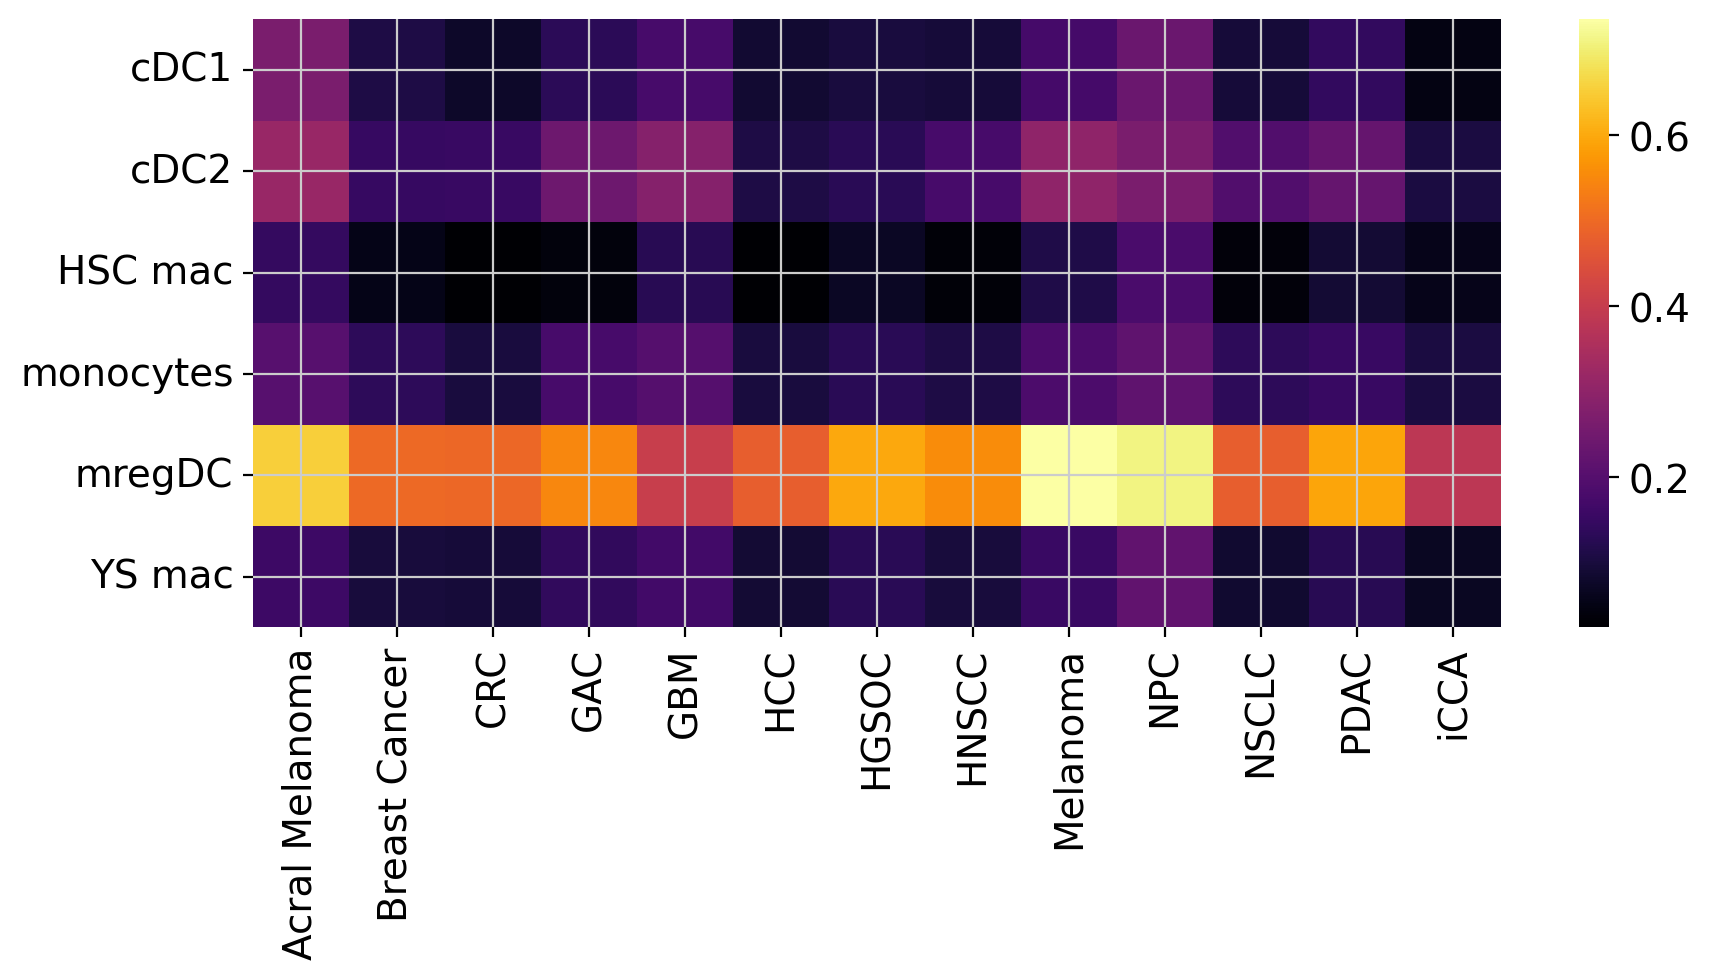

In [31]:
# Plot the heatmap
plt.figure(figsize=(10, 4))
ax = sns.heatmap(mean_scores_df, cmap='inferno')
ax.set_yticklabels(['cDC1', 'cDC2', 'HSC mac','monocytes','mregDC','YS mac'], rotation=0)  # Change the labels and their rotation
plt.xlabel('')
plt.ylabel('')
plt.show()

# figured out dpi is what was causing the lines

In [27]:
sc.settings.set_figure_params(dpi=100, facecolor="white")

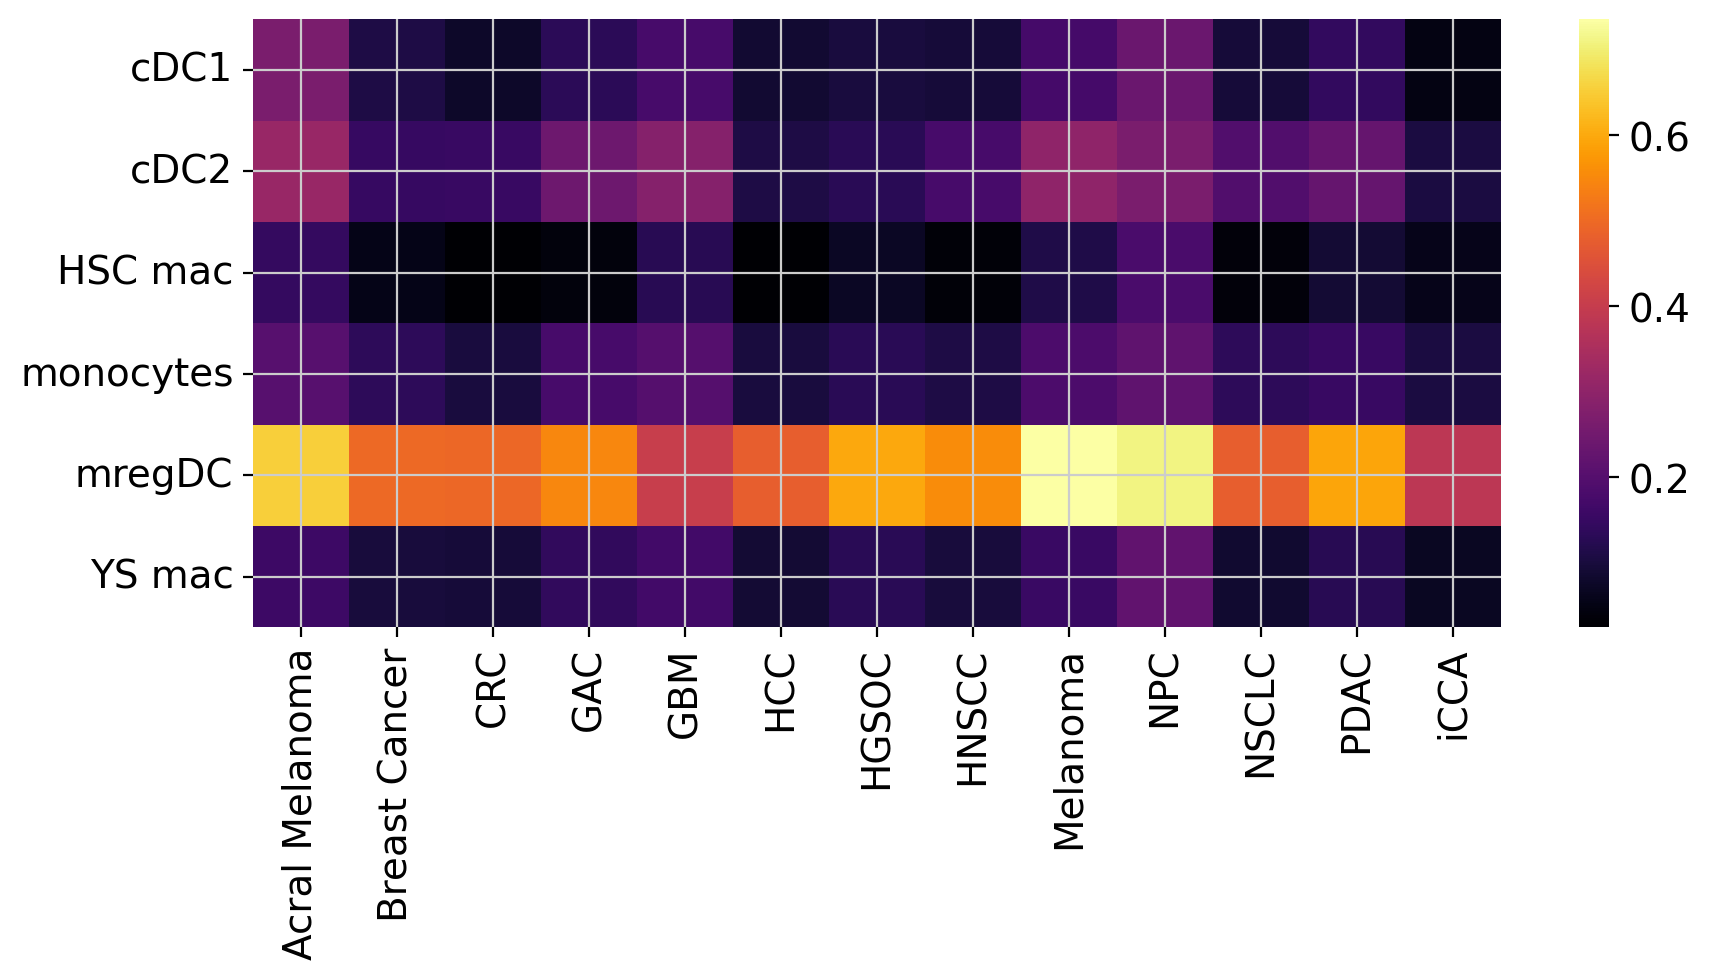

In [28]:
# Plot the heatmap
plt.figure(figsize=(10, 4))
ax = sns.heatmap(mean_scores_df, cmap='inferno')
ax.set_yticklabels(['cDC1', 'cDC2', 'HSC mac','monocytes','mregDC','YS mac'], rotation=0)  # Change the labels and their rotation
plt.xlabel('')
plt.ylabel('')
plt.show()